In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv('sbg_indoor.csv')
df

,MA,FA,Cs,Pb,Sn,Br,Cl,I,Bandgap,HOMO,LUMO,Light source,Illuminance (lux),PCE,Voc,Jsc(?A cm-2),FF
0,0.36,0.54,0.1,1,0,0.40,0.00,0.60,1.75,0.45,0.20,FL,1000,32.70,1.090,104.8,0.8200
1,0.36,0.54,0.1,1,0,0.40,0.00,0.60,1.75,0.45,0.20,FL,500,28.90,1.010,53.7,0.8100
2,0.36,0.54,0.1,1,0,0.40,0.00,0.60,1.75,0.45,0.20,FL,300,24.20,0.970,31.3,0.8100
3,0.36,0.54,0.1,1,0,0.40,0.00,0.60,1.75,0.45,0.20,FL,200,22.30,0.910,19.3,0.7500
4,0.36,0.54,0.1,1,0,0.40,0.00,0.60,1.75,0.45,0.20,FL,100,21.50,0.880,10.0,0.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1.00,0.00,0.0,1,0,0.00,0.04,0.96,1.70,0.20,0.50,FL,322,23.00,0.901,105.0,0.7790
334,1.00,0.00,0.0,1,0,0.00,0.00,1.00,1.53,0.36,0.57,LED,1000,17.80,0.779,147.0,0.4600
335,0.00,0.00,1.0,1,0,0.33,0.00,0.66,1.80,0.50,0.80,LED,200,25.21,0.970,22.0,0.7572
336,0.00,0.00,1.0,1,0,0.33,0.00,0.66,1.80,0.50,0.80,LED,500,26.69,1.020,57.0,0.7626


In [35]:
df.keys()

Index(['MA', 'FA', 'Cs', 'Pb', 'Sn', 'Br', 'Cl', 'I', 'Bandgap', 'HOMO',
       'LUMO', 'Light source', 'Illuminance (lux)', 'PCE', 'Voc',
       'Jsc(?A cm-2)', 'FF'],
      dtype='object')

In [36]:
df.rename(columns={'Light source': 'Light_source'}, inplace=True)
df.rename(columns={'Illuminance (lux)': 'Illuminance'}, inplace=True)

In [37]:
df=df.dropna()

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Light_source']=le.fit_transform(df['Light_source'])

In [39]:
df.keys()

Index(['MA', 'FA', 'Cs', 'Pb', 'Sn', 'Br', 'Cl', 'I', 'Bandgap', 'HOMO',
       'LUMO', 'Light_source', 'Illuminance', 'PCE', 'Voc', 'Jsc(?A cm-2)',
       'FF'],
      dtype='object')

In [40]:
df=df[['Bandgap', 'HOMO',
       'LUMO', 'Light_source', 'Illuminance', 'PCE']]

In [41]:
df

,Bandgap,HOMO,LUMO,Light_source,Illuminance,PCE
0,1.75,0.45,0.20,0,1000,32.70
1,1.75,0.45,0.20,0,500,28.90
2,1.75,0.45,0.20,0,300,24.20
3,1.75,0.45,0.20,0,200,22.30
4,1.75,0.45,0.20,0,100,21.50
...,...,...,...,...,...,...
333,1.70,0.20,0.50,0,322,23.00
334,1.53,0.36,0.57,2,1000,17.80
335,1.80,0.50,0.80,2,200,25.21
336,1.80,0.50,0.80,2,500,26.69


In [42]:
df.corr()

,Bandgap,HOMO,LUMO,Light_source,Illuminance,PCE
Bandgap,1.000000,0.327340,0.073914,-0.217383,0.191144,0.196949
HOMO,0.327340,1.000000,-0.068100,-0.175305,0.120661,-0.153307
LUMO,0.073914,-0.068100,1.000000,-0.010906,-0.063530,-0.223785
Light_source,-0.217383,-0.175305,-0.010906,1.000000,-0.080800,-0.044033
Illuminance,0.191144,0.120661,-0.063530,-0.080800,1.000000,0.266174
PCE,0.196949,-0.153307,-0.223785,-0.044033,0.266174,1.000000


<Axes: >

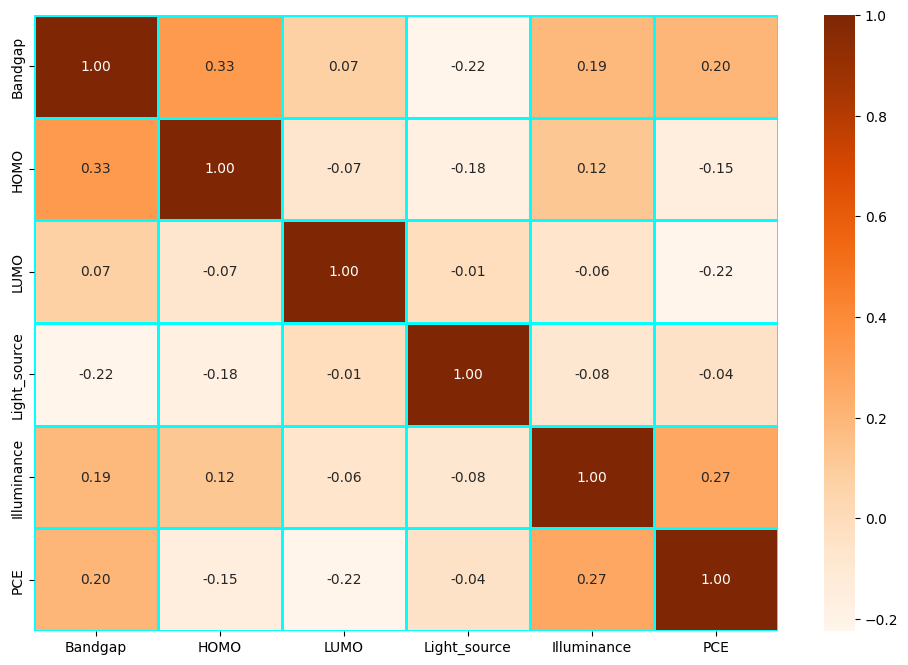

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Oranges',annot=True,fmt='.2f',linewidth=1,linecolor='cyan')

In [44]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [46]:
y_pred=regressor.predict(X)

Text(0, 0.5, 'predicted_pce')

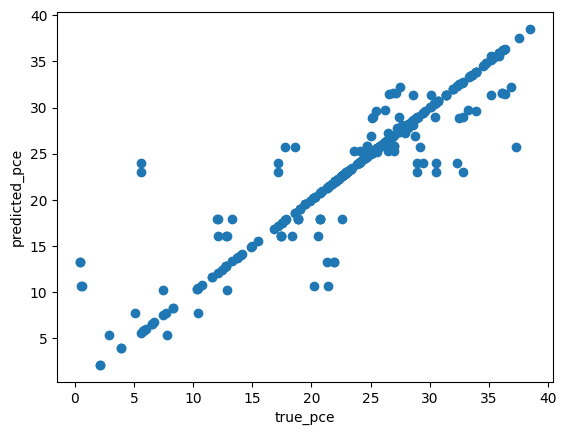

In [47]:
plt.scatter(y,y_pred)
plt.xlabel('true_pce')
plt.ylabel('predicted_pce')

In [48]:
from sklearn.metrics import r2_score
print(r2_score(y,y_pred))

0.8695790185580357


In [49]:
regressor

DecisionTreeRegressor(random_state=0)

In [50]:
import pickle
pickle.dump(regressor,open('regressor.pkl','wb'))